<a href="https://colab.research.google.com/github/kylemccullough1/MachineLearning/blob/main/Assignment_3_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)
# Reserve 10,000 samples for validation
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]

(50000, 32, 32, 3)


In [ ]:
class Cnn:
  def __init__(self, network, lr, batch_size):
    self.network = network
    self.lr = lr
    self.batch_size = batch_size

  def run(self):
    if(self.network == 'Lenet'):
      cnn = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3), strides=1),
      tf.keras.layers.MaxPooling2D((2, 2), strides=2),
      
      tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', strides=1),
      tf.keras.layers.MaxPooling2D((2, 2), strides=2),

      tf.keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='relu'),
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(84, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
      ])
      cnn.compile(
          optimizer=tf.keras.optimizers.Adam(self.lr),
          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
          metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
      )

      history = cnn.fit(
          X_train,
          y_train,
          verbose=0,
          epochs=25,
          batch_size=self.batch_size,
          validation_data=(X_val, y_val),
      )

      results = cnn.evaluate(X_test, y_test, batch_size=self.batch_size)
      print("Feed LeNet loss, LeNet forward test acc:", results)
      print(history.history.keys())
      plt.plot(history.history['sparse_categorical_accuracy'])
      plt.plot(history.history['val_sparse_categorical_accuracy'])
      plt.title('model accuracy')
      plt.ylabel('LeNet accuracy')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()

      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('LeNet loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()
    elif(self.network == 'Feed'):
      feed = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
      tf.keras.layers.Dense(6, activation='relu'),
      tf.keras.layers.Dense(6, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(120, activation='relu'),
      tf.keras.layers.Dense(84, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
      ])
      feed.compile(
          optimizer=tf.keras.optimizers.Adam(self.lr),
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
      )

      history = feed.fit(
          X_train,
          y_train,
          verbose=0,
          epochs=25,
          batch_size=self.batch_size,
          validation_data=(X_val, y_val),
      )

      results = feed.evaluate(X_test, y_test, batch_size=self.batch_size)
      print("Feed forward test loss, Feed forward test acc:", results)

      plt.plot(history.history['sparse_categorical_accuracy'])
      plt.plot(history.history['val_sparse_categorical_accuracy'])
      plt.title('Feed forward accuracy')
      plt.ylabel('Feed forward accuracy')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()

      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('Feed forward loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()

134/134 [==============================] - 0s 3ms/step - loss: 1.2744 - sparse_categorical_accuracy: 0.5978
Feed LeNet loss, LeNet forward test acc: [1.2744204998016357, 0.5978000164031982]
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


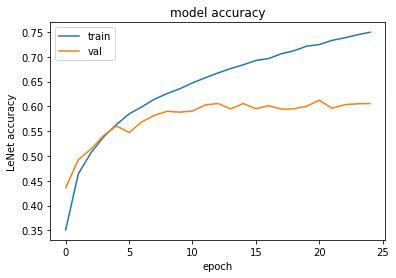

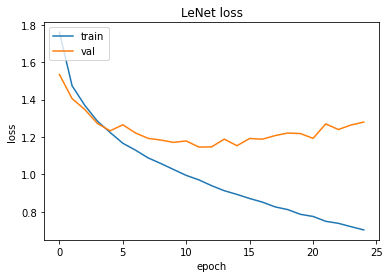

In [ ]:
# Questions 1-3 using LeNet network
lenet = Cnn('Lenet', .001, 75)
lenet.run()

1. Learning rate dictates how quickly a dataset will converge. So having a smaller learning rate works better with a lot more epochs. With 25 epochs, the best learning rate I found was .001, but it only worked best with a higher batch_size.

2. Batch size can increase the accuracy of the error gradient. It also speeds up the training process significantly. I found that with 25 epochs, the most effective fast batch_size was 75, combined with the .001 learning rate.

3. The best performance was was .001 for the learning rate and 75 for the batch_size. The accuracy I got was .73




134/134 [==============================] - 0s 3ms/step - loss: 1.8865 - sparse_categorical_accuracy: 0.2825
Feed forward test loss, Feed forward test acc: [1.8864877223968506, 0.2824999988079071]


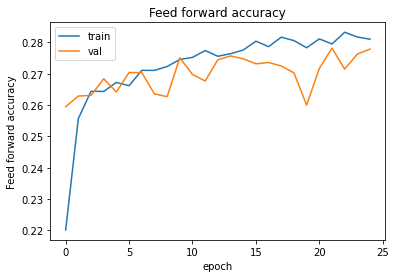

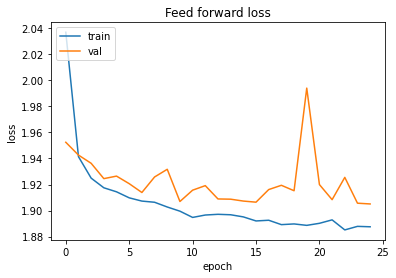

In [ ]:
# Question 4 using feed forward network
feed = Cnn('Feed', .001, 75)
feed.run()

4a. The performance isn't very good, and the best accuracy I was able to get was .34 with learning rate of .001 and batch_size of 75.

4b. There are 30000 parameters going into this model, and I don't believe it's worth it considering the accuracy of the model.

